# TP2 : résultats du 1er tour de l'élection présidentielle 2022 à Paris
L'objet de ce TP est d'exploiter les données issues de l'élection présidentielle de mai 2022. Vous accèderez aux données du premier tour pour la ville de Paris, au format JSON, à cette adresse: [https://www.data.gouv.fr/fr/datasets/r/047770c7-fce3-4c70-a304-79124f4f17f9](https://www.data.gouv.fr/fr/datasets/r/047770c7-fce3-4c70-a304-79124f4f17f9)

## 1. Récupération et analyse du JSON
À l'aide de la librairie `requests` étudiée précédemment, chargez le JSON qui nous intéresse.

Vous allez ensuite étudier son format. Vous répondrez en particulier à ces questions précises, à l'aide de scripts python: 
 1. affichez le type de la structure JSON téléchargée
 2. affichez son premier élément
 3. affichez tous les champs d'un élément; dans lequel de ces champs se trouvent les données électorales ? 
 4. affichez les noms des champs en rapport avec les données électorales
 5. affichez le nombre de votants dans le bureau de vote d'identifiant : 12-24 

In [1]:
import requests

def get_data(link: str) -> any:
    
    data = requests.get(link)
    return data.json()

def search_by_bureau(data: list, bur: str) -> dict:
    for line in data:
        if (bur == line['fields']['id_bvote']):
            return line
        
    return None

if (__name__ == '__main__'):
    link = 'https://www.data.gouv.fr/fr/datasets/r/047770c7-fce3-4c70-a304-79124f4f17f9'
    data = get_data(link)

    # 1. Le type de la structure téléchargée
    type_data = type(data)
    print(f"Le type de la structure téléchargée est : {type_data}")

    # 2. Afficher le premier élément
    print(f"Le premier élément est : {data[0]}")

    # 3. Afficher tous les champs d'un élément
    print(f"Les champs d'un élément : {list(data[0].values())}")
    print(f"Les clés d'un élément : {list(data[0].keys())}")

    # Nous voyons que le champ dans lequel se trouvent les données électorales est : `fields`

    # 4. Afficher le nom des champs en rapport avec les données électorales
    print(f"Les noms des champs électoraux d'un élément : {list(data[0]['fields'].keys())}")

    # 5. Afficher le nombre de votants pour le bureau de vote donné
    bureau_donne = search_by_bureau(data, '12-24')
    print(f"Le nombre de votant est de : {bureau_donne['fields']['nb_votant']}")



Le type de la structure téléchargée est : <class 'list'>
Le premier élément est : {'datasetid': 'elections-presidentielles2022-1ertour', 'recordid': '8804fedfc714fd49eb0572409db49d7c44717e44', 'fields': {'lassalle_jean': 8.0, 'pecresse_valerie': 17, 'zemmour_eric': 47.0, 'hidalgo_anne': 14.0, 'dupont_aignan_nicolas': 13.0, 'date_tour': '2022-04-10', 'id_bvote': '20-10', 'geo_shape': {'coordinates': [[[2.394116980208429, 48.872810002202804], [2.394114339472205, 48.87280202613119], [2.3941708973077622, 48.87273808823805], [2.394218937555646, 48.87268276150374], [2.3942158089284993, 48.87267136909135], [2.394047633205376, 48.872579389214096], [2.3938803792706, 48.87248814851382], [2.393712203357712, 48.87239616904243], [2.3935449505988142, 48.87230492785833], [2.393376777243449, 48.87221294700804], [2.393209525649946, 48.872121706239405], [2.393208852650277, 48.872121313415796], [2.393073388243987, 48.872037160258515], [2.392939965544769, 48.87195402814653], [2.392804502018421, 48.8718698

## 2. Extraction des données d'un candidat
Ecrivez une fonction `afficheBureauArrondissementScore_Candidat` qui, pour un candidat donné, affiche pour tous les bureaux de vote l'identifiant du bureau, l'arrondissement du bureau et le score du candidat.

In [2]:
def afficheBureauArrondissementScore_Candidat(data: list, cand: str):
    for line in data:
        bureau = line['fields']
        resText = f"\nL'identifiant du bureau : {bureau['num_bureau']}\n"
        resText+= f"L'arrondissement du bureau : {bureau['arr_bv']}\n"

        if (cand not in bureau.keys()):
            # Si le candidat n'existe pas
            resText+= f"Le candidat {cand} ne fait pas partie des votes de ce bureau\n"

        else:
            # Si le candidat existe
            resText+= f"L'arrondissement du bureau : {bureau[cand]}\n"

        print(resText)

afficheBureauArrondissementScore_Candidat(data, 'arthaud_nathalie')




L'identifiant du bureau : 10
L'arrondissement du bureau : 20
L'arrondissement du bureau : 6


L'identifiant du bureau : 8
L'arrondissement du bureau : 18
L'arrondissement du bureau : 3


L'identifiant du bureau : 5
L'arrondissement du bureau : 06
L'arrondissement du bureau : 1


L'identifiant du bureau : 25
L'arrondissement du bureau : 17
L'arrondissement du bureau : 5


L'identifiant du bureau : 26
L'arrondissement du bureau : 18
L'arrondissement du bureau : 0


L'identifiant du bureau : 18
L'arrondissement du bureau : 05
L'arrondissement du bureau : 4


L'identifiant du bureau : 14
L'arrondissement du bureau : 10
L'arrondissement du bureau : 3


L'identifiant du bureau : 46
L'arrondissement du bureau : 19
L'arrondissement du bureau : 2


L'identifiant du bureau : 21
L'arrondissement du bureau : 11
L'arrondissement du bureau : 2


L'identifiant du bureau : 25
L'arrondissement du bureau : 07
L'arrondissement du bureau : 1


L'identifiant du bureau : 70
L'arrondissement du bureau : 19


Ecrivez une fonction `scoreTotalCandidat` qui, pour un candidat donné, renvoie son score total (entier).

In [9]:
def scoreTotalCandidat(data: list, cand: str) -> int:
    response = {
        cand: 0
    }

    for line in data:
        bureau = line['fields']

        if (cand in bureau.keys()):
            response[cand] += bureau[cand]

    return response[cand]

print(scoreTotalCandidat(data, 'arthaud_nathalie'))


2809


Ecrivez une fonction `listeScoresArrondissements_Candidat` qui renvoie la liste des scores totaux d'un candidat donné par arrondissement (il y a 20 arrondissements).

In [13]:
def listeScoresArrondissements_Candidat(data: list, cand: str) -> list:
    response = [0 for i in range(20)]

    for line in data:
        bureau = line['fields']
        arrondissement = int(bureau['arr_bv'])

        if (cand in bureau.keys()):
            response[arrondissement - 1] += bureau[cand]

    return response

scoresCandidat = listeScoresArrondissements_Candidat(data, 'arthaud_nathalie')
print(scoresCandidat)

[12, 16, 44, 24, 73, 34, 28, 17, 60, 114, 202, 208, 359, 216, 256, 73, 132, 255, 325, 361]


Ecrivez une fonction `abstention_Arrondissements` qui renvoie la liste des % d'abstention par arrondissement.

In [19]:
def abstention_Arrondissements(data: list) -> list:
    def __prepare(data: list) -> dict:
        response = {}

        for line in data:
            bureau = line['fields']
            arrondissement = str(bureau['arr_bv'])

            nb_votant = bureau['nb_votant']
            nb_inscrit = bureau['nb_inscrit']

            if (arrondissement not in response.keys()):
                response[arrondissement] = {
                    'nb_votant': 0,
                    'nb_inscrit': 0,
                }

            response[arrondissement]['nb_votant'] += nb_votant
            response[arrondissement]['nb_inscrit'] += nb_inscrit
        
        return response

    def __calculate(data: dict) -> dict:
        response = {}

        for arr, values in data.items():
            nb_votant = values['nb_votant']
            nb_inscrit = values['nb_inscrit']

            response[arr] = (1.00 - (float(nb_votant) / float(nb_inscrit))) * 100

        return response

    return __calculate(__prepare(data))

print(abstention_Arrondissements(data))


{'20': 23.561582963741547, '18': 24.013583146701624, '06': 18.61263479980596, '17': 20.081139840049687, '05': 18.8645222879266, '10': 21.532322426177174, '19': 27.055956595705556, '11': 20.392835897000083, '07': 18.40995360607338, '14': 21.185402890031835, '13': 22.100463140610916, '09': 18.142747124437932, '12': 21.147533903429217, '16': 21.00881784506362, '15': 20.885578598517206, '01': 21.158008658008654, '02': 21.454597413731513, '04': 20.530335628227192, '08': 20.075787794176303, '03': 20.806148896237374}


## 3. Reconstruction d'un dictionnaire ad hoc
On souhaite pouvoir accéder aux données de certains candidats pour tous les arrondissements. Afin d'éviter d'avoir à revisiter les résultats de tous les bureaux, nous voulons construire un dictionnaire qui, pour chaque arrondissement, stocke les scores des candidats passés en paramètre dans une liste.
Ecrivez la fonction `creeDictArrondissement_ScoreListeCandidats` qui renvoie ce dictionnaire.

Exemple: `creeDictArrondissement_ScoreListeCandidats(json,[candidat1,candidat2])` renvoie un dictionnaire de la forme 
```py
{
 1:{
    candidat1:scoreCandidat1Arrondissement1,
    candidat2:scoreCandidat2Arrondissement1
   },
 2:{
    candidat1:scoreCandidat1Arrondissement2,
    candidat2:scoreCandidat2Arrondissement2
   },
   ...
}
```

In [24]:
def creeDictArrondissement_ScoreListeCandidats(data, *liste_candidats):
    response = {}

    if (len(liste_candidats) <= 0):
        return response
    
    for line in data:
        bureau = line['fields']
        arrondissement = str(bureau['arr_bv'])
        
        if (arrondissement not in response.keys()):
            response[arrondissement] = {}


        for cand in liste_candidats:
            if (cand not in response[arrondissement].keys()):
                response[arrondissement][cand] = 0

            if (cand not in bureau.keys()):
                score = 0
            else:
                score = bureau[cand]

            response[arrondissement][cand] += score

    return response

print(creeDictArrondissement_ScoreListeCandidats(data, 'jadot_yannick', 'dupont_aignan_nicolas'))



{'20': {'jadot_yannick': 6759.0, 'dupont_aignan_nicolas': 811.0}, '18': {'jadot_yannick': 7370.0, 'dupont_aignan_nicolas': 678.0}, '06': {'jadot_yannick': 1519.0, 'dupont_aignan_nicolas': 202.0}, '17': {'jadot_yannick': 5378.0, 'dupont_aignan_nicolas': 725.0}, '05': {'jadot_yannick': 2624.0, 'dupont_aignan_nicolas': 268.0}, '10': {'jadot_yannick': 4525.0, 'dupont_aignan_nicolas': 302.0}, '19': {'jadot_yannick': 5621.0, 'dupont_aignan_nicolas': 625.0}, '11': {'jadot_yannick': 7577.0, 'dupont_aignan_nicolas': 535.0}, '07': {'jadot_yannick': 1294.0, 'dupont_aignan_nicolas': 220.0}, '14': {'jadot_yannick': 5699.0, 'dupont_aignan_nicolas': 683.0}, '13': {'jadot_yannick': 6375.0, 'dupont_aignan_nicolas': 965.0}, '09': {'jadot_yannick': 3065.0, 'dupont_aignan_nicolas': 276.0}, '12': {'jadot_yannick': 6179.0, 'dupont_aignan_nicolas': 727.0}, '16': {'jadot_yannick': 2790.0, 'dupont_aignan_nicolas': 665.0}, '15': {'jadot_yannick': 7972.0, 'dupont_aignan_nicolas': 1315.0}, '01': {'jadot_yannick':

## 4. Graphique
Ecrivez une fonction `graphiqueArrondissements_Candidat` qui, pour un candidat donné, utilise le dictionnaire précédent pour produire un graphique en barres présentant les scores de ce candidat par arrondissement.

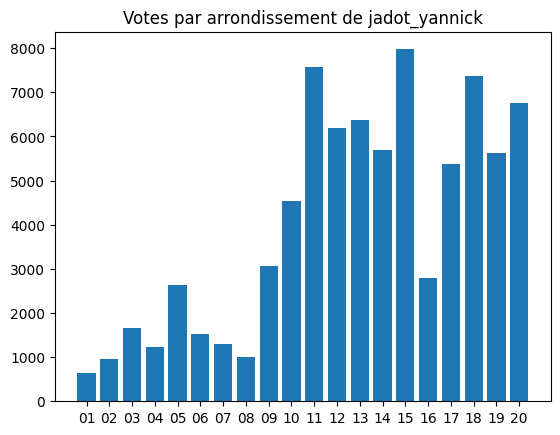

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def graphiqueArrondissements_Candidat(data: list, cand: str):
    arrondissment_data = creeDictArrondissement_ScoreListeCandidats(data, cand)
    

    ax_axis = []
    y_axis = []

    for arr in sorted(arrondissment_data):
        values = arrondissment_data[arr]
        
        ax_axis.append(arr)

        y_axis.append(values[cand])

    fig, ax = plt.subplots()  # Création d'une Figure contenant un seul axe. subplots retourne un couple, une référence vers un objet Figure (fig) et une référence vers un objet axe (ax)
    ax.bar(ax_axis, y_axis);  
    ax.set_title(f"Votes par arrondissement de {cand}") 
    plt.show() 

graphiqueArrondissements_Candidat(data, 'jadot_yannick')


Ecrivez une fonction `graphiqueArrondissements_Candidats` qui, pour une liste de candidats donnée, utilise le dictionnaire précédent pour produire un graphique en barres présentant les scores des candidats par arrondissement. Pour réaliser ce graphique plus compliqué, allez lire [cette documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py).

{'01': [631.0, 77.0], '02': [952.0, 89.0], '03': [1655.0, 92.0], '04': [1225.0, 140.0], '05': [2624.0, 268.0], '06': [1519.0, 202.0], '07': [1294.0, 220.0], '08': [997.0, 149.0], '09': [3065.0, 276.0], '10': [4525.0, 302.0], '11': [7577.0, 535.0], '12': [6179.0, 727.0], '13': [6375.0, 965.0], '14': [5699.0, 683.0], '15': [7972.0, 1315.0], '16': [2790.0, 665.0], '17': [5378.0, 725.0], '18': [7370.0, 678.0], '19': [5621.0, 625.0], '20': [6759.0, 811.0]}


TypeError: 'dict_keys' object is not subscriptable

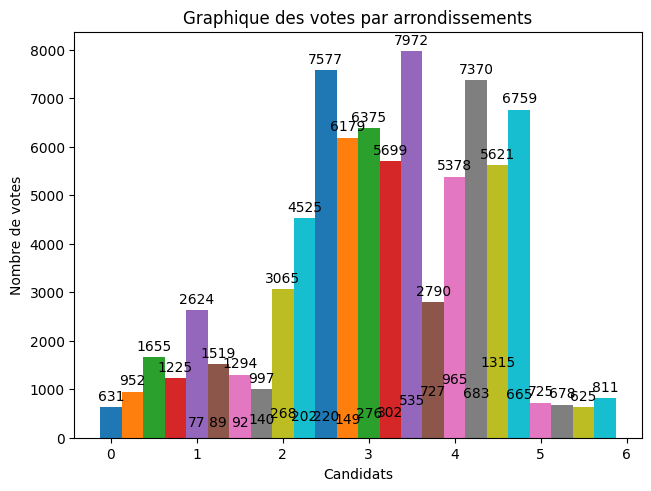

In [52]:
def graphiqueArrondissements_Candidats(data: dict, *liste_candidat: str):

    arrondissements = []
    votes_arrondissements = {}

    for cand in liste_candidat:
        arrondissment_data = creeDictArrondissement_ScoreListeCandidats(data, cand)
        
        if (arrondissements is []):
            arrondissements = sorted(arrondissment_data)
    
    penguin_means = {
        'Bill Depth': (18.35, 18.43, 14.98),
        'Bill Length': (38.79, 48.83, 47.50),
        'Flipper Length': (189.95, 195.82, 217.19),
    }

    x = np.arange(len(arrondissements))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Penguin attributes by arrondissements')
    ax.set_xticks(x + width, arrondissements)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 250)

    plt.show()
    # TODO Corriger cette partie 

graphiqueArrondissements_Candidats(data, 'jadot_yannick', 'dupont_aignan_nicolas')